**Задача 1** 
*Даны значения величины заработной платы заемщиков банка (zp) и значения их
поведенческого кредитного скоринга (ks): zp = [35, 45, 190, 200, 40, 70, 54, 150, 120, 110],
ks = [401, 574, 874, 919, 459, 739, 653, 902, 746, 832]. Используя математические
операции, посчитать коэффициенты линейной регрессии, приняв за X заработную плату
(то есть, zp - признак), а за y - значения скорингового балла (то есть, ks - целевая
переменная). Произвести расчет как с использованием intercept, так и без.*

In [1]:
import numpy as np

In [2]:
zp = np.array([35, 45, 190, 200, 40, 70, 54, 150, 120, 110])
ks = np.array([401, 574, 874, 919, 459, 739, 653, 902, 746, 832])

Если предположить о наличии линейной взаимосвязи между переменными, связь между ними можно описать линейной функцией, вида:    
$\displaystyle ks=a+b\cdot zp$  
Найдем коэффициент $b$ по формуле:  
$\displaystyle b=\frac{\bar{xy}-\bar x\cdot\bar y}{\bar{x^2}-{\bar x}^2}$

In [3]:
b=(np.mean(zp * ks) - np.mean(zp) * np.mean(ks)) / (np.mean(zp**2) - np.mean(zp) ** 2)
b

2.620538882402765

интерсепт a, находим по формуле:  
$a=\bar y-b\cdot\bar x=\bar{ks}-b\cdot\bar{zp}$

In [4]:
a=np.mean(ks)-b*np.mean(zp)
a

444.1773573243596

**Ответ**

Полученная функция $ks=444.18+2.62\cdot zp$ описывает линейную взаимосвязь между величиной заработной платы, и кредитного скоринга.

---

**Задача 2** 
*Посчитать коэффициент линейной регрессии при заработной плате (zp), используя
градиентный спуск (без intercept).*

функция потерь:

In [5]:
def mse(b, x, y):
    return np.sum((b*x-y)**2)/len(x)

Производная нашей функции потерь:

In [6]:
def mse_p(b,x,y):
    return (2/len(x))*np.sum((b*x-y)*x)

In [7]:
alpha=1e-06
b=0.1
mse_min=mse(b,zp,ks)
i_min=1
b_min=b
for i in range(10000):
    b-=alpha*mse_p(b,zp,ks)
    if i%100==0:
        print(f'шаг {i}, b={b}, mse={mse(b, zp,ks)}')
    if mse(b,zp,ks)>mse_min:
        print(f'шаг {i_min}, b={b_min}, mse={mse_min},\nДостигнут минимум.')
        break
    else:
        mse_min=mse(b,zp,ks)
        i_min=i
        b_min=b

шаг 0, b=0.25952808000000005, mse=493237.7212546963
шаг 100, b=5.54537842245223, mse=58151.31823171113
шаг 200, b=5.868748638669329, mse=56522.97550129376
шаг 300, b=5.888531320728348, mse=56516.88130936019
шаг 400, b=5.8897415574471985, mse=56516.85850140053
шаг 500, b=5.889815595583751, mse=56516.858416040064
шаг 600, b=5.889820124983314, mse=56516.85841572062
шаг 628, b=5.889820285147628, mse=56516.85841571966,
Достигнут минимум.


In [8]:
b_min

5.889820285147628

**Ответ**

Полученная функция $ks=5.89\cdot zp$ частично описывает линейную взаимосвязь между величиной заработной платы, и кредитного скоринга.

для сравнения функций с интерсептом и без построим графики:

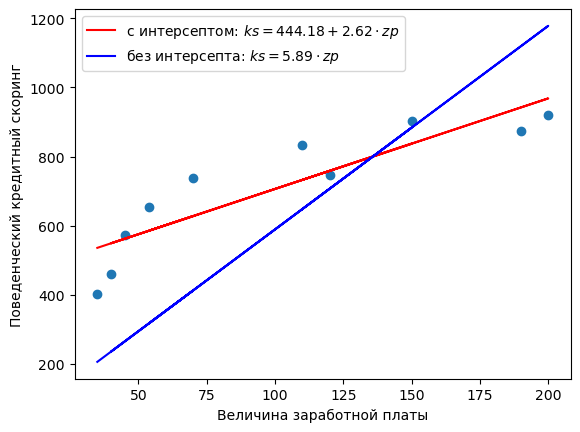

In [9]:
import matplotlib.pyplot as plt
plt.scatter(zp,ks)
plt.plot(zp, 444.18+2.62*zp, c='r', label=r'с интерсептом: $ks=444.18+2.62\cdot zp$')
plt.plot(zp, 5.89*zp, c='b', label=r'без интерсепта: $ks=5.89\cdot zp$')
plt.legend()
plt.xlabel('Величина заработной платы')
plt.ylabel('Поведенческий кредитный скоринг', rotation=90)
plt.show()

---

**Задача 3** 
*Произвести вычисления как в пункте 2, но с вычислением intercept. Учесть, что
изменение коэффициентов должно производиться
на каждом шаге одновременно (то есть изменение одного коэффициента не должно
влиять на изменение другого во время одной итерации).*

Функция потерь



In [10]:
def mse_ab(a,b, x, y):
    return np.sum(((a+b*x)-y)**2)/len(x)

Частная производная функции потерь по $a$

In [11]:
def mse_pa(a,b,x,y): 
    return 2*np.sum((a+b*x)-y)/len(x)

Частная производная функции потерь по $b$

In [12]:
def mse_pb(a,b,x,y):
    return 2*np.sum(((a+b*x)-y)*x)/len(x)

In [13]:
alpha=5e-05
b=0.1
a=0.1
mseab_min=mse_ab(a,b,zp,ks)
i_min=1
b_min=b
a_min=a
   
for i in range(1000000):
    a-=alpha*mse_pa(a,b,zp,ks)
    b-=alpha*mse_pb(a,b,zp,ks)
    if i%50000==0:
        print(f' шаг {i}, a={a}, b={b}, mse={mse_ab(a, b, zp,ks)}')
    if mse_ab(a, b,zp,ks)>mseab_min:
        print(f'шаг {i_min}, a={a_min}, b={b_min}, mse={mseab_min},\nДостигнут минимум.')
        break
    else:
        mseab_min=mse_ab(a, b,zp,ks)
        i_min=i
        b_min=b
        a_min=a
print(f'a={a_min}\nb={b_min}')

 шаг 0, a=0.169966, b=8.07468054476, mse=122318.06397097567
 шаг 50000, a=319.27767648420047, b=3.5398324356503275, mse=10427.569111705801
 шаг 100000, a=409.0442373734796, b=2.879127619051743, mse=6783.521961452364
 шаг 150000, a=434.29473705519484, b=2.693277491833349, mse=6495.188684804794
 шаг 200000, a=441.3974680483413, b=2.6409995775222037, mse=6472.374468908443
 шаг 250000, a=443.39540029510493, b=2.62629428586797, mse=6470.569306309746
 шаг 300000, a=443.95740007610897, b=2.622157823932053, mse=6470.426473787141
 шаг 350000, a=444.1154853937451, b=2.6209942756156086, mse=6470.415172240385
 шаг 400000, a=444.159953325044, b=2.6206669802831115, mse=6470.414278011555
 шаг 450000, a=444.1724617410292, b=2.6205749151465225, mse=6470.414207256183
 шаг 500000, a=444.1759802422447, b=2.6205490180788695, mse=6470.414201657699
шаг 520164, a=444.17653163778414, b=2.62054495966686, mse=6470.414201349592,
Достигнут минимум.
a=444.17653163778414
b=2.62054495966686


**Ответ**

Полученна та же функция $ks=444.18+2.62\cdot zp$ что и в первом задани